In [1]:
# PACKAGES AND LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [3]:
No_Data_Path = Path("no")
Yes_Data_Path = Path("yes")

In [4]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [5]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[WindowsPath('no/no0.jpg'), WindowsPath('no/no1.jpg'), WindowsPath('no/no10.jpg'), WindowsPath('no/no100.jpg'), WindowsPath('no/no1000.jpg')]
----------------------------------------------------------------------------------------------------
[WindowsPath('yes/y0.jpg'), WindowsPath('yes/y1.jpg'), WindowsPath('yes/y10.jpg'), WindowsPath('yes/y100.jpg'), WindowsPath('yes/y1000.jpg')]


In [6]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)
    
for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [7]:
print(Yes_No_List[0:10])

[WindowsPath('no/no0.jpg'), WindowsPath('no/no1.jpg'), WindowsPath('no/no10.jpg'), WindowsPath('no/no100.jpg'), WindowsPath('no/no1000.jpg'), WindowsPath('no/no1001.jpg'), WindowsPath('no/no1002.jpg'), WindowsPath('no/no1003.jpg'), WindowsPath('no/no1004.jpg'), WindowsPath('no/no1005.jpg')]


In [8]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [9]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [10]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [11]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [12]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [13]:
print(Main_Train_Data.head(-1))

                JPG TUMOR_CATEGORY
0        no\no0.jpg             no
1        no\no1.jpg             no
2       no\no10.jpg             no
3      no\no100.jpg             no
4     no\no1000.jpg             no
...             ...            ...
2994   yes\y994.jpg            yes
2995   yes\y995.jpg            yes
2996   yes\y996.jpg            yes
2997   yes\y997.jpg            yes
2998   yes\y998.jpg            yes

[2999 rows x 2 columns]


In [14]:
# TESTING

In [15]:
Prediction_Path = Path("pred")

In [16]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [17]:
print(Test_JPG_Path[0:5])

[WindowsPath('pred/pred0.jpg'), WindowsPath('pred/pred1.jpg'), WindowsPath('pred/pred10.jpg'), WindowsPath('pred/pred11.jpg'), WindowsPath('pred/pred12.jpg')]


In [18]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [19]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [20]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [21]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [22]:
print(Test_Data.head())

               JPG TUMOR_CATEGORY
0   pred\pred0.jpg           pred
1   pred\pred1.jpg           pred
2  pred\pred10.jpg           pred
3  pred\pred11.jpg           pred
4  pred\pred12.jpg           pred


In [23]:
# SHUFFLING

In [24]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)


In [25]:
print(Main_Train_Data.head(-1))

                JPG TUMOR_CATEGORY
0      yes\y628.jpg            yes
1     yes\y1388.jpg            yes
2     no\no1260.jpg             no
3      no\no499.jpg             no
4      no\no716.jpg             no
...             ...            ...
2994  yes\y1461.jpg            yes
2995   no\no404.jpg             no
2996  no\no1404.jpg             no
2997   no\no489.jpg             no
2998  yes\y1339.jpg            yes

[2999 rows x 2 columns]


In [26]:
# VISUALIZATION

Text(0.5, 1.0, 'no')

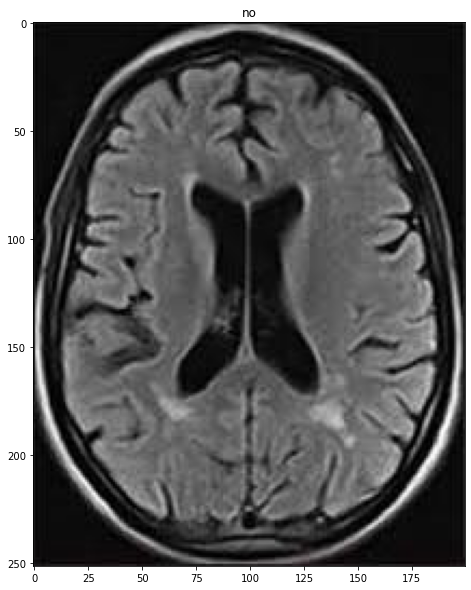

In [27]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'no')

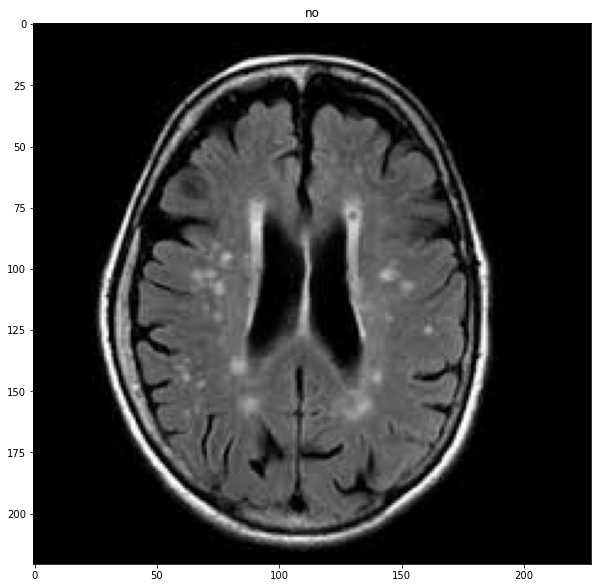

In [28]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

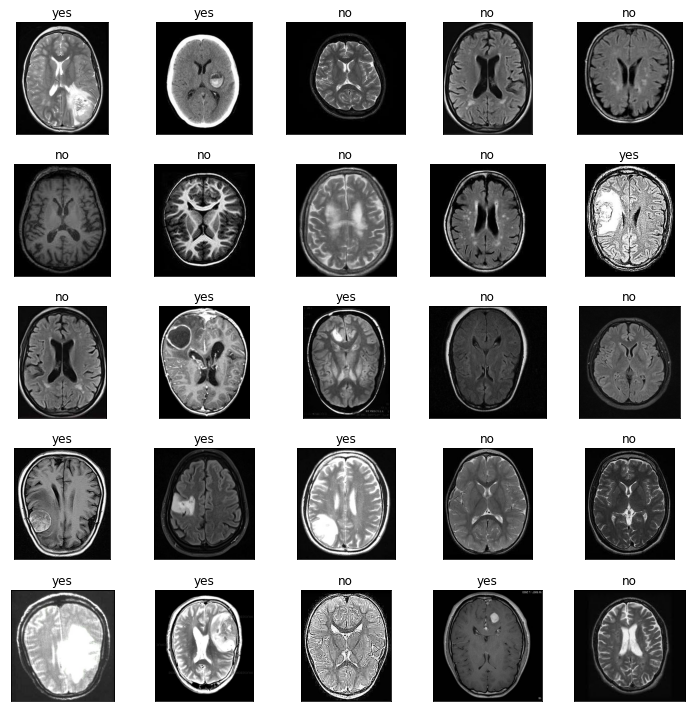

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()


In [30]:
 # MODEL TRAINING DATA

In [31]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [32]:
print(train_data.shape)

(2700, 2)


In [33]:
print(train_data.head())

                JPG TUMOR_CATEGORY
433   yes\y1365.jpg            yes
1151  no\no1195.jpg             no
73    yes\y1099.jpg            yes
1536   yes\y531.jpg            yes
2709  no\no1323.jpg             no


In [34]:
print(test_data.shape)

(300, 2)


In [35]:
print(test_data.head())

                JPG TUMOR_CATEGORY
1801  yes\y1072.jpg            yes
1190   yes\y791.jpg            yes
1817   yes\y193.jpg            yes
251    yes\y164.jpg            yes
2505   no\no532.jpg             no


In [36]:
# IMAGE DATA GENERATOR WITHOUT DIVERSIFICATION

In [37]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [38]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [39]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [40]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


In [41]:
# CHECKING

In [42]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [43]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [44]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break


DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [45]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 0, 0]
(200, 200, 1)


In [46]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 0, 1, 1, 0]
(200, 200, 1)


In [47]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 1, 1, 0]
(200, 200, 1)


In [48]:
# CNN MODEL FOR NON-DIVERSIFICATION

In [49]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

In [50]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [51]:
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30,steps_per_epoch=120)

Epoch 1/30
120/120 [==============================] - 134s 1s/step - loss: 0.8050 - accuracy: 0.7121 - val_loss: 0.4666 - val_accuracy: 0.8000
Epoch 2/30
120/120 [==============================] - 271s 2s/step - loss: 0.4044 - accuracy: 0.8213 - val_loss: 0.3393 - val_accuracy: 0.9037
Epoch 3/30
120/120 [==============================] - 630s 5s/step - loss: 0.3066 - accuracy: 0.8707 - val_loss: 0.3058 - val_accuracy: 0.8667
Epoch 4/30
120/120 [==============================] - 106s 879ms/step - loss: 0.2579 - accuracy: 0.8983 - val_loss: 0.2682 - val_accuracy: 0.9148
Epoch 5/30
120/120 [==============================] - 102s 851ms/step - loss: 0.2149 - accuracy: 0.9222 - val_loss: 0.1718 - val_accuracy: 0.9593
Epoch 6/30
120/120 [==============================] - 102s 850ms/step - loss: 0.1796 - accuracy: 0.9377 - val_loss: 0.1634 - val_accuracy: 0.9519
Epoch 7/30
120/120 [==============================] - 102s 846ms/step - loss: 0.1533 - accuracy: 0.9473 - val_loss: 0.1181 - val_accu

In [52]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

In [53]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

No handles with labels found to put in legend.


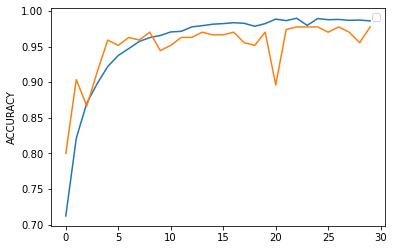

In [54]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

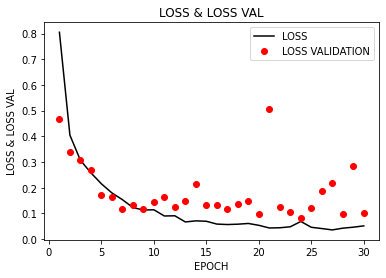

In [55]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

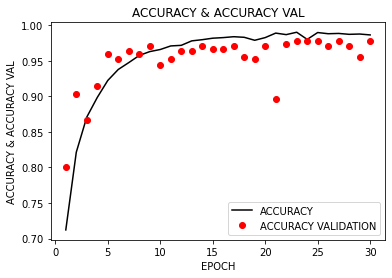

In [56]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<AxesSubplot:>

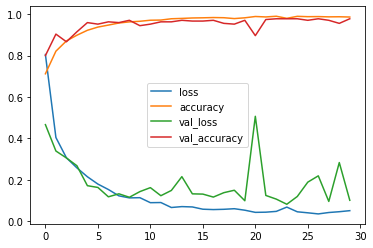

In [57]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

In [58]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.0847
ACCURACY:  0.97


In [59]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [60]:
print(Main_Data_Prediction.head())

               JPG
0   pred\pred0.jpg
1   pred\pred1.jpg
2  pred\pred10.jpg
3  pred\pred11.jpg
4  pred\pred12.jpg


In [61]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [62]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [63]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

3/3 [==============================] - 1s 208ms/step


In [64]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [65]:
print(Model_Test_Prediction)

[0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1]


In [66]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO']


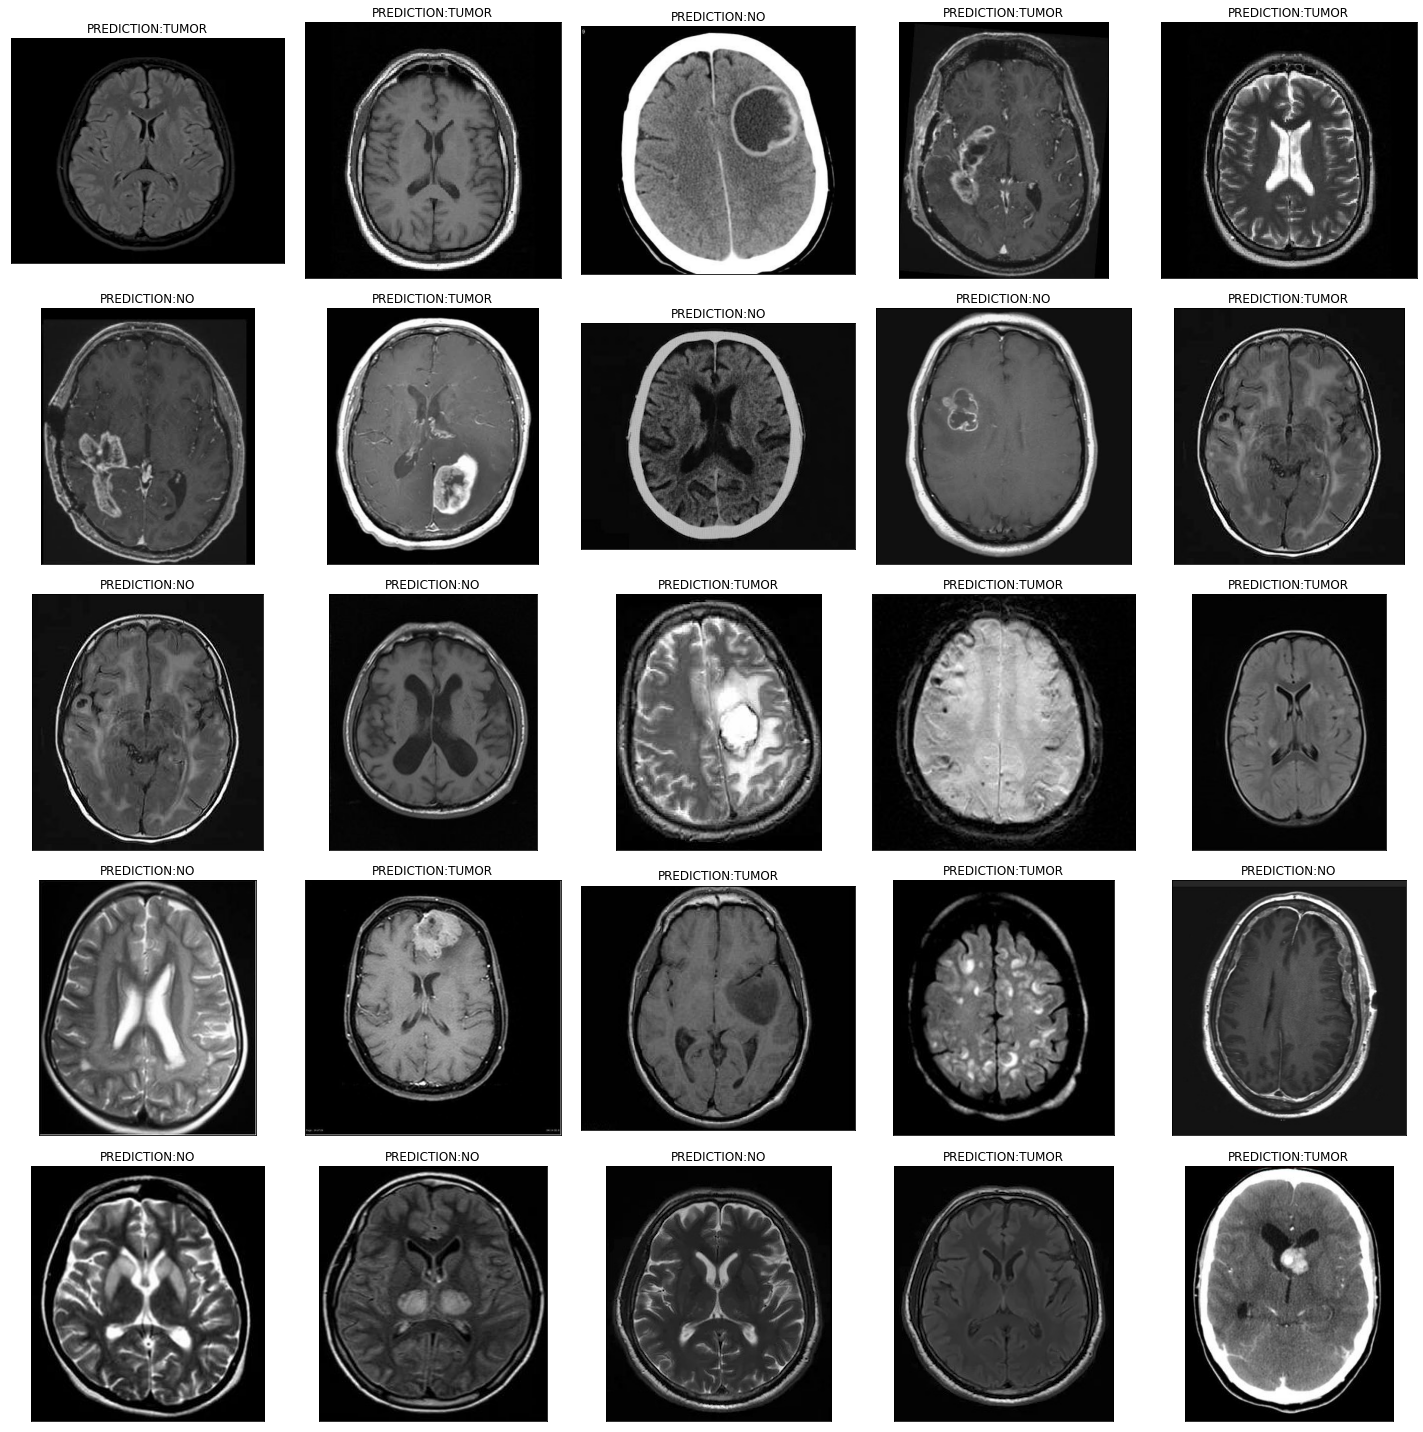

In [67]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

In [68]:
Data_Generator_Div = ImageDataGenerator(rescale=1./255,brightness_range=[0.3,0.9],
                                       rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest",
                                       validation_split=0.1)

In [69]:
Train_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [70]:
Validation_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [71]:
Test_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [72]:
Model_Two = Sequential()

Model_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(64,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(256,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Flatten())
Model_Two.add(Dropout(0.5))
Model_Two.add(Dense(512,activation="relu"))
Model_Two.add(Dense(2,activation="softmax"))

In [73]:
Model_Two.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])


In [74]:
#model fitting

In [75]:
ANN_Model_Two = Model_Two.fit(Train_Set_Div,
                              validation_data=Validation_Set_Div,
                              batch_size=20,
                      epochs=50)

Epoch 1/50
122/122 [==============================] - 84s 683ms/step - loss: 0.7104 - accuracy: 0.5844 - val_loss: 0.6297 - val_accuracy: 0.6889
Epoch 2/50
122/122 [==============================] - 89s 733ms/step - loss: 0.6474 - accuracy: 0.6469 - val_loss: 0.6322 - val_accuracy: 0.6741
Epoch 3/50
122/122 [==============================] - 82s 670ms/step - loss: 0.6233 - accuracy: 0.6580 - val_loss: 0.5946 - val_accuracy: 0.7222
Epoch 4/50
122/122 [==============================] - 81s 662ms/step - loss: 0.5923 - accuracy: 0.6852 - val_loss: 0.5249 - val_accuracy: 0.7296
Epoch 5/50
122/122 [==============================] - 79s 647ms/step - loss: 0.5643 - accuracy: 0.7272 - val_loss: 0.6041 - val_accuracy: 0.6296
Epoch 6/50
122/122 [==============================] - 702s 6s/step - loss: 0.5620 - accuracy: 0.7276 - val_loss: 0.5281 - val_accuracy: 0.7630
Epoch 7/50
122/122 [==============================] - 86s 703ms/step - loss: 0.5322 - accuracy: 0.7572 - val_loss: 0.5280 - val_accu

In [76]:
print(Model_Two.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 128)     

In [77]:
HistoryDict_Two = ANN_Model_Two.history

val_losses_Two = HistoryDict_Two["val_loss"]
val_acc_Two = HistoryDict_Two["val_accuracy"]
acc_Two = HistoryDict_Two["accuracy"]
losses_Two = HistoryDict_Two["loss"]
epochs_Two = range(1,len(val_losses_Two)+1)

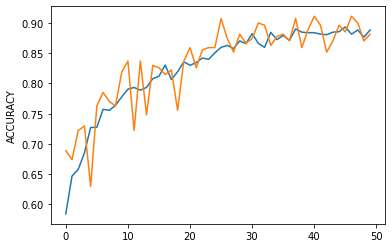

In [78]:
plt.plot(ANN_Model_Two.history["accuracy"])
plt.plot(ANN_Model_Two.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.show()

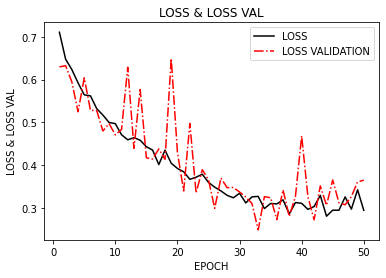

In [79]:
plt.plot(epochs_Two,losses_Two,"k-",label="LOSS")
plt.plot(epochs_Two,val_losses_Two,"r-.",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

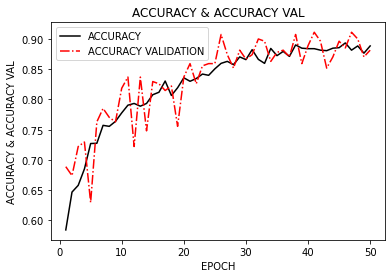

In [80]:
plt.plot(epochs_Two,acc_Two,"k-",label="ACCURACY")
plt.plot(epochs_Two,val_acc_Two,"r-.",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<AxesSubplot:>

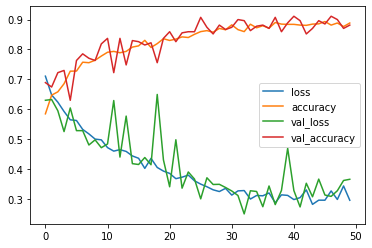

In [81]:
Dict_Summary_Two = pd.DataFrame(ANN_Model_Two.history)
Dict_Summary_Two.plot()

In [88]:
# import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# load the dataset
digits = load_digits()

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# create a decision tree classifier with default parameters
clf = DecisionTreeClassifier()

# train the classifier on the training set
clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8518518518518519


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits

# load the dataset
digits = load_digits()

# define the parameter grid for the grid search
param_grid = {
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
}

# create a decision tree classifier object
clf = DecisionTreeClassifier()

# create a GridSearchCV object with the parameter grid and the decision tree classifier
grid_search = GridSearchCV(clf, param_grid, cv=5)

# fit the GridSearchCV object on the dataset
grid_search.fit(digits.data, digits.target)

# print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_split': 2}
Best score:  0.7813525224388734


In [92]:
import os
import cv2
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Define the paths to the images
Yes_Data_Path = Path("yes")
No_Data_Path = Path("no")
Yes_Data_Path = Path("yes")
No_Data_Path = Path("no")
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)
    
for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)
    
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

# Load the yes images and labels
yes_images = []
yes_labels = []
for filename in os.listdir(Yes_Data_Path):
    img = cv2.imread(os.path.join(Yes_Data_Path, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (50, 50))
    yes_images.append(img)
    yes_labels.append(1)

# Load the no images and labels
no_images = []
no_labels = []
for filename in os.listdir(No_Data_Path):
    img = cv2.imread(os.path.join(No_Data_Path, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (50, 50))
    no_images.append(img)
    no_labels.append(0)

# Combine the images and labels into a single dataset
images = yes_images + no_images
labels = yes_labels + no_labels

# Preprocess the images and labels
images = np.array(images)
images = np.array(images, dtype=np.uint8) # Convert to integer values
labels = np.array(labels)
images = images.reshape(-1, np.prod(images.shape[1:]))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)

# Fit the Naive Bayes model to the training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the TP, TN, FP, and FN
TP = cm[1][1]                                                                                                                             
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 230
True Negatives: 204
False Positives: 53
False Negatives: 113


In [93]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the TP, TN, FP, and FN
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 336
True Negatives: 241
False Positives: 16
False Negatives: 7


In [94]:
import os
import cv2
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the TP, TN, FP, and FN
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 324
True Negatives: 237
False Positives: 20
False Negatives: 19


In [95]:
import os
import cv2
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Fit the Logistic Regression model to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the TP, TN, FP, and FN
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 329
True Negatives: 249
False Positives: 8
False Negatives: 14


In [102]:
# Combine the images and labels into a single dataset
images = yes_images + no_images
labels = yes_labels + no_labels

# Preprocess the images and labels
images = np.array(images)
labels = np.array(labels)
images = images.reshape(-1, np.prod(images.shape[1:]))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)

# Fit the SVM model to the training set
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the TP, TN, FP, and FN
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 331
True Negatives: 250
False Positives: 7
False Negatives: 12
